In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Generate the data

In [22]:
np.random.seed(101)
x = np.random.rand(100 , 1) - 0.5
y = 3 * x[: , 0]**2 + 0.05 * np.random.randn(100)

In [23]:
df = pd.DataFrame()
df['x'] = x.reshape(100)
df['y'] = y
df

,x,y
0,0.016399,-0.051532
1,0.070668,0.079620
2,-0.471526,0.593634
3,-0.328478,0.298989
4,0.185277,0.094856
...,...,...
95,0.342219,0.396232
96,-0.115062,0.056261
97,0.051666,-0.045144
98,0.210538,0.126710


##### Data is not in linear and we want to build best fit line where we want most of data points are close to best fit line

Text(0.5, 1.0, 'x vs y')

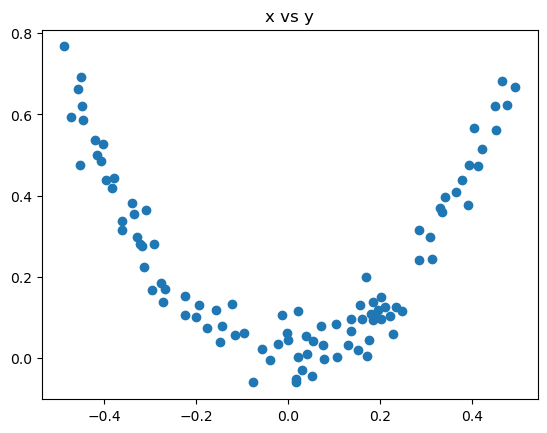

In [24]:
plt.scatter(df['x'] , df['y'])
plt.title('x vs y')

#### calculate avg of y

In [25]:
df['pred1'] = df['y'].mean()

In [27]:
df.head(2)

,x,y,pred1
0,0.016399,-0.051532,0.236808
1,0.070668,0.079620,0.236808


#### In gradient boost we target the loss / error .

#### calculate loss value  / residual value : we want to make value value 0 then model is correct

In [28]:
df['residual1'] = df['y'] - df['pred1']

In [29]:
df.head(2)

,x,y,pred1,residual1
0,0.016399,-0.051532,0.236808,-0.288340
1,0.070668,0.079620,0.236808,-0.157188


#### We draw best fit line

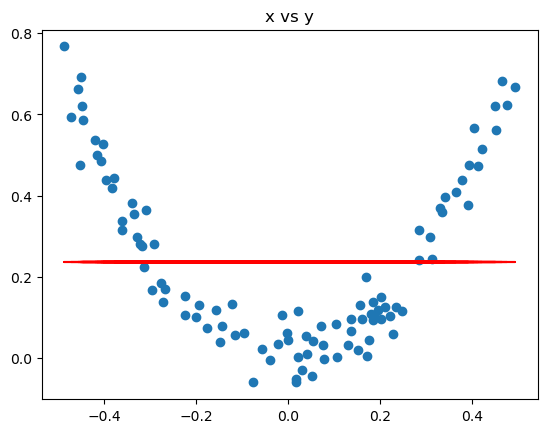

In [31]:
plt.scatter(df['x'] , df['y'])
plt.plot(df['x'] , df['pred1']  , color = 'red')
plt.title('x vs y')
plt.show()

##### Insights : Here we get lots of erros means most of the data points are lagly away from best fit line

#### Build DTree model

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dt1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [40]:
dt1

DecisionTreeRegressor(max_leaf_nodes=8)

In [41]:
dt1.fit(df['x'].values.reshape(100,1) , df['residual1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [42]:
from sklearn.tree import plot_tree

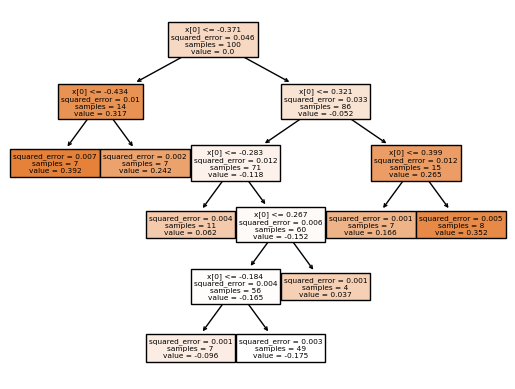

In [45]:
plot_tree(dt1 , filled = True)
plt.show()

#### we want to build best line so thats why we need data . that we generate it

In [48]:
x_test = np.linspace(-0.5 , 0.5 , 500)

In [54]:
#x_test

#### Predict base on data

In [50]:
y_pred = 0.236 + dt1.predict(x_test.reshape(500,1))

In [53]:
#y_pred

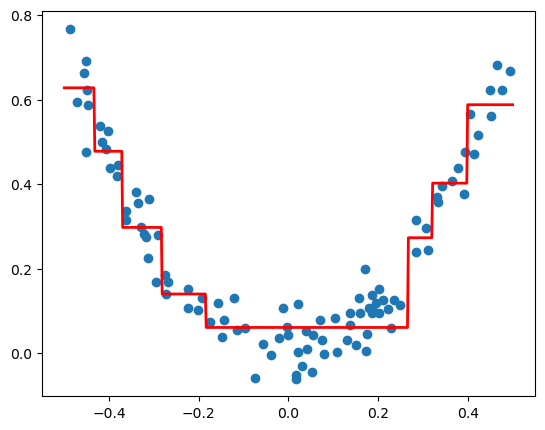

In [56]:
plt.figure(figsize = (14,5))
plt.subplot(121)
# line for
plt.plot(x_test , y_pred , linewidth = 2 ,color = 'red' )
plt.scatter(df['x'] , df['y'])
#plt.plot(df['x'] , df['pred1']  , color = 'red')
#plt.title('x vs y')
plt.show()

#### Insights : Here we try to best fit the most data points and we achieve in some percentage still we have error there

#### we reduce the dataset (from 500 to 100). so we get most of data points should on line or close to line where we get less error

In [59]:
df['pred2'] = 0.2368 + dt1.predict(df['x'].values.reshape(100,1))

In [60]:
df.head(2)

,x,y,pred1,residual1,pred2
0,0.016399,-0.051532,0.236808,-0.288340,0.061933
1,0.070668,0.079620,0.236808,-0.157188,0.061933


In [61]:
df['residual2'] = df['y'] - df['pred2']

In [62]:
df.head(2)

,x,y,pred1,residual1,pred2,residual2
0,0.016399,-0.051532,0.236808,-0.288340,0.061933,-0.113465
1,0.070668,0.079620,0.236808,-0.157188,0.061933,0.017687


##### for checking this residual is correct or not for thats why we build another decision Tree

In [63]:
dt2 = DecisionTreeRegressor(max_leaf_nodes = 8)
dt2.fit(df['x'].values.reshape(100,1) , df['residual2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

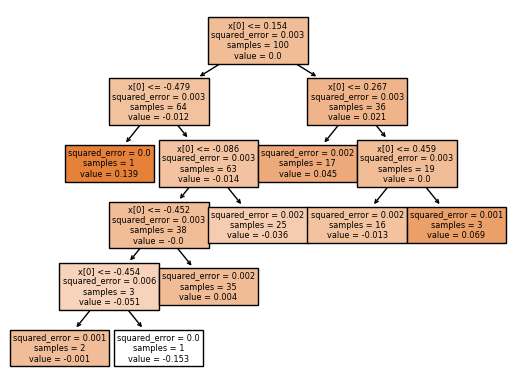

In [65]:
plot_tree(dt2 , filled = True)
plt.show()

In [67]:
y_pred = 0.2368 + sum(regressor.predict(x_test.reshape(-1,1)) for regressor in (dt1 , dt2) )

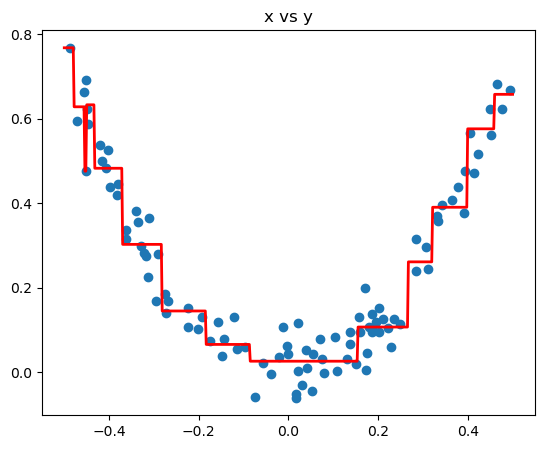

In [70]:
plt.figure(figsize = (14  ,5))
plt.subplot(121)
plt.plot(x_test , y_pred , linewidth = 2 , color = 'red' )
plt.scatter(df['x'] , df['y'])
plt.title('x vs y')
plt.show()

#### Insights : we get good line not very accurate there is syill residual